# データの読み込み

In [24]:
# フォルダーの中身の全部のcsvファイルを読み込む
import pandas as pd
import glob

# フォルダーの中身の全部のcsvファイルを読み込む
all_files = glob.glob("../data/output/*.csv")

# データフレームのリストを作成
li = []

# ファイルの数だけループ
for filename in all_files:
    # ファイルを読み込む
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    # リストに追加
    li.append(df)
    
# 一つのデータフレームにまとめる
df = pd.concat(li, axis=0, ignore_index=True)

print(df)

../data/output/肉を焼く2acc_info.csv.csv
../data/output/焼きそば1acc_info.csv.csv
../data/output/火おこし1acc_info.csv.csv
../data/output/テント生活1acc_info.csv.csv
../data/output/テント生活2acc_info.csv.csv
../data/output/火おこし2acc_info.csv.csv
../data/output/焼きそば2acc_info.csv.csv
../data/output/肉を焼く1acc_info.csv.csv
../data/output/テント生活4acc_info.csv.csv
../data/output/焼きそば3acc_info.csv.csv
../data/output/火おこし3acc_info.csv.csv
../data/output/火おこし4acc_info.csv.csv
../data/output/テント生活3acc_info.csv.csv
      Unnamed: 0    x_mean     x_std     x_min     x_25%     x_50%     x_75%  \
0              0  0.005178  0.055029 -0.153206 -0.021472  0.005584  0.051351   
1             50  0.177253  0.493233 -0.978687 -0.138559  0.249749  0.429902   
2            100  0.050252  0.342141 -0.571791 -0.200010 -0.052645  0.250465   
3            150  0.299596  1.023195 -2.542891 -0.080426  0.203880  0.915670   
4            200  0.073034  0.286022 -0.774135  0.001829  0.041997  0.120788   
...          ...       ...       ..

# データの前処理

In [25]:
from sklearn.model_selection import train_test_split


x = df.drop('answer', axis=1)
x = x.drop("Unnamed: 0", axis=1)
t = df['answer']

x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2)


# ヒートマップを表示

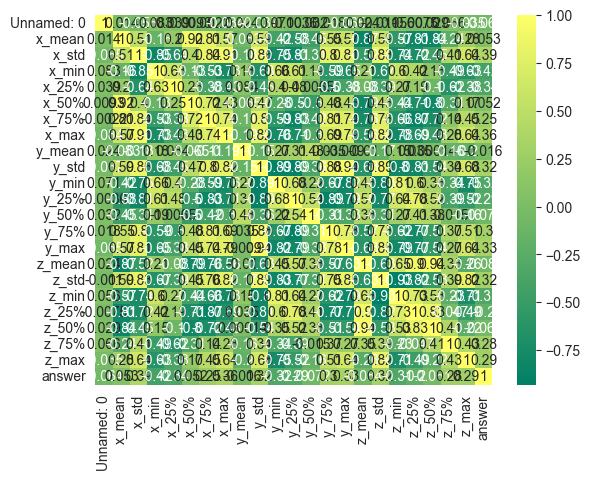

In [26]:
# グラフを描画する
import matplotlib.pyplot as plt
import seaborn as sns

# ヒートマップを作成
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.show()

# SVMで学習

In [27]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, t_train)

SVC()

In [28]:
#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')


accuracy: 0.7671052631578947
precision: 0.6774151459501344
recall: 0.7671052631578947
f1: 0.7119035402566812


/Users/k22120kk/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LinearSVC


In [29]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')



/Users/k22120kk/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy: 0.7947368421052632
precision: 0.801577547106633
recall: 0.7947368421052632
f1: 0.7658917986362848


/Users/k22120kk/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 決定木で学習

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')




accuracy: 0.7513157894736842
precision: 0.7588522020943186
recall: 0.7513157894736842
f1: 0.7546832719948537


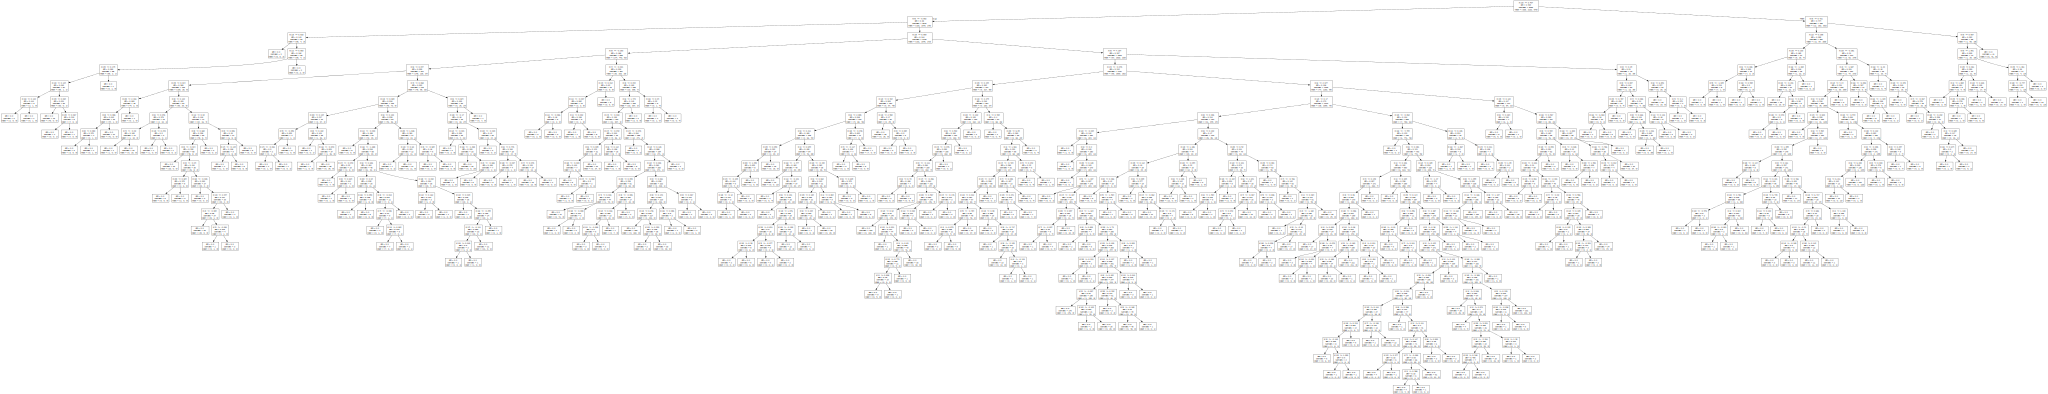

In [31]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model)
graph_tree = graphviz.Source(dot_data)
display(graph_tree)



# ロジスティック回帰で学習

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')





accuracy: 0.8157894736842105
precision: 0.8136051739836482
recall: 0.8157894736842105
f1: 0.7999090919847938


/Users/k22120kk/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ランダムフォレストで学習

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')



accuracy: 0.8486842105263158
precision: 0.8432961173213709
recall: 0.8486842105263158
f1: 0.8429199381980605


# ニューラルネットワークで学習

In [34]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')


accuracy: 0.8289473684210527
precision: 0.8203679915656746
recall: 0.8289473684210527
f1: 0.8220549937049376


/Users/k22120kk/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# KNeighborsClassifierで学習 

In [35]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')



accuracy: 0.7934210526315789
precision: 0.7857236494784633
recall: 0.7934210526315789
f1: 0.7771973121423839


# ナイーブベイズ


In [36]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')


accuracy: 0.43026315789473685
precision: 0.7405611448607823
recall: 0.43026315789473685
f1: 0.4598364394778342


# GradientBoostingClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')

accuracy: 0.85
precision: 0.8446745481299235
recall: 0.85
f1: 0.8449733560540659


# Stochastic Gradient Descent


In [39]:

from sklearn.linear_model import SGDClassifier

model = SGDClassifier()

model.fit(x_train, t_train)


#Accuracy（正解率） Precision（適合率） Recall（再現率）F1score（F 値）で評価
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = model.predict(x_test)

print(f'accuracy: {accuracy_score(t_test, y_pred)}')
print(f'precision: {precision_score(t_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(t_test, y_pred, average="weighted")}')
print(f'f1: {f1_score(t_test, y_pred, average="weighted")}')


accuracy: 0.7855263157894737
precision: 0.7893442594800321
recall: 0.7855263157894737
f1: 0.7669823360594246
